# Visão Computacional com YOLOv8

In [1]:
import torch
print("CUDA disponível:", torch.cuda.is_available())
print("Nome da GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Nenhuma GPU CUDA")


CUDA disponível: True
Nome da GPU: NVIDIA GeForce RTX 4070 Laptop GPU


In [ ]:
# ! pip install ultralytics --upgrade
# ! pip install opencv-contrib-python --upgrade
# ! pip install opencv-python --upgrade



In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Carrega o modelo
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\nielsen.castelo\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 15.7MB/s]



0: 480x640 1 person, 1 cell phone, 15.4ms
Speed: 3.0ms preprocess, 15.4ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


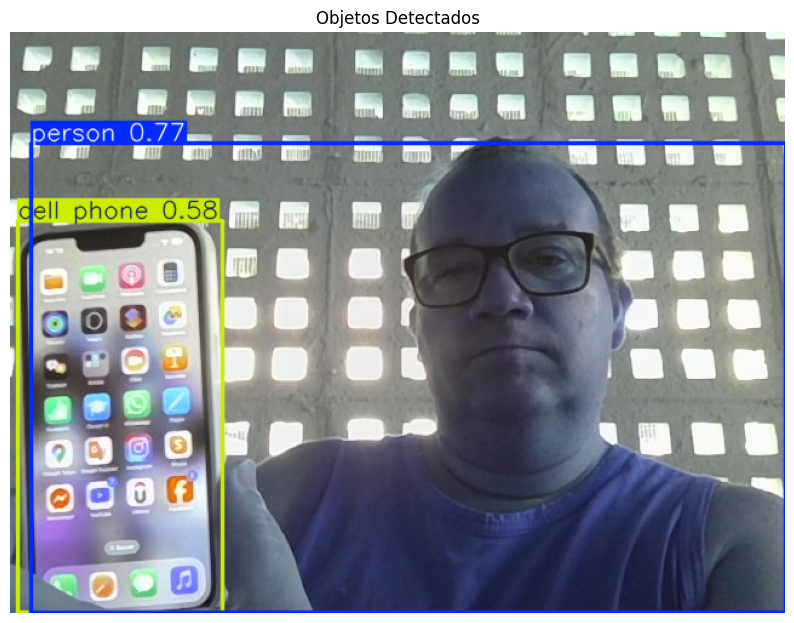

Objetos detectados: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell

In [27]:


def detectar_objetos(frame):
    # Faz a inferência
    results = model(frame)
    return results[0]

# Captura um frame da webcam
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

# Converte de BGR (OpenCV) para RGB (matplotlib)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Detecta objetos
result = detectar_objetos(frame_rgb)

# Desenha as caixas na imagem
annotated_frame = result.plot()  # já vem com caixas e labels desenhados

# Converte a imagem anotada para RGB para exibir no matplotlib
annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Exibe a imagem no notebook
plt.figure(figsize=(10, 8))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.title('Objetos Detectados')
plt.show()

# Imprime classes detectadas
print("Objetos detectados:", result.names)



0: 480x640 1 person, 1 cup, 15.4ms
Speed: 29.0ms preprocess, 15.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


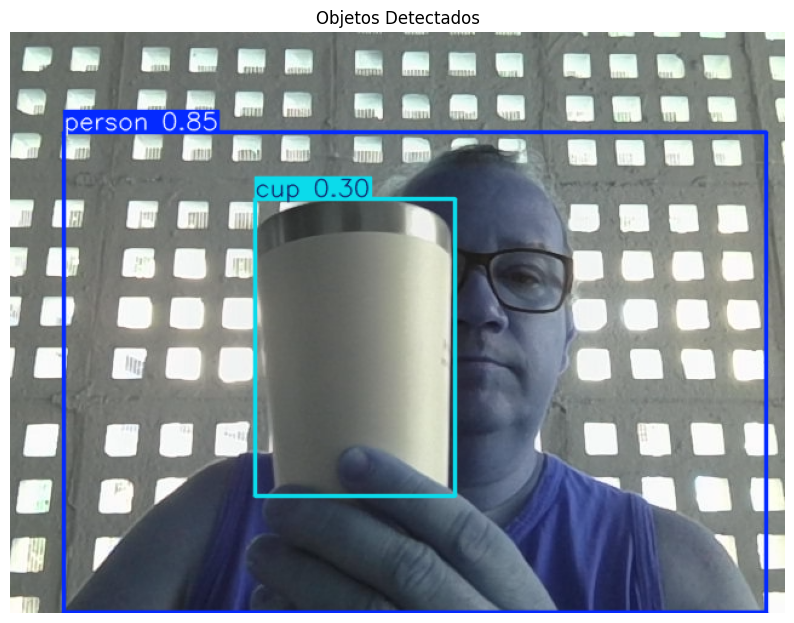

Objetos detectados: ['person', 'cup']


In [28]:


# Função para detectar objetos
def detectar_objetos(frame):
    results = model(frame)[0]
    nomes = [results.names[int(cls)] for cls in results.boxes.cls]
    return results, nomes

# Captura um frame da webcam
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

# Converte para RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Detecta objetos
result, nomes_detectados = detectar_objetos(frame_rgb)

# Mostra imagem com detecções
annotated_frame = result.plot()
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Objetos Detectados")
plt.show()

# Lista de objetos detectados
print("Objetos detectados:", nomes_detectados)
